# Import des données

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
df_train = pd.read_csv('train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_train[['label']].value_counts()

label
1        4684
7        4401
3        4351
9        4188
2        4177
6        4137
0        4132
4        4072
8        4063
5        3795
Name: count, dtype: int64

# Preprocessing

In [100]:
from sklearn.model_selection import train_test_split

X = df_train.drop('label', axis=1).astype(float).to_numpy().reshape((-1,28,28))
y = df_train.pop('label').astype(float).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

X_train=X_train/255
X_test=X_test/255

# Model

In [101]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.Sequential([
    # Première couche convolutionnelle
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPool2D(2, 2),
    layers.Dropout(0.1),

    # Deuxième couche convolutionnelle
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2, 2),
    layers.Dropout(0.1),

    # Troisième couche convolutionnelle
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2, 2),
    layers.Dropout(0.1),

    # Global Average Pooling
    layers.GlobalAveragePooling2D(),

    # Première couche dense
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Deuxième couche dense
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Couche de sortie
    layers.Dense(10, activation='softmax'),
])

# Scheduler pour le taux d'apprentissage
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)

# Compilateur
model.compile(optimizer=optimizers.RMSprop(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\ryanh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,754 (467.79 KB)

 Trainable params: 118,922 (464.54 KB)

 Non-trainable params: 832 (3.25 KB)

# Callbacks

In [102]:
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True),
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

# Data Augmentation

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,  # Augmenter la rotation
    width_shift_range=0.2,  # Augmenter les décalages horizontaux
    height_shift_range=0.2,  # Augmenter les décalages verticaux
    zoom_range=0.2,  # Augmenter le zoom
    shear_range=0.2,  # Ajouter un effet de cisaillement
    horizontal_flip=True,
    fill_mode='nearest'
)

In [104]:
batch_size = 32
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    epochs=25,
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=callbacks
)

Epoch 1/25
  4/879 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.0977 - loss: 2.9534

C:\Users\ryanh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


879/879 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.4636 - loss: 1.5619 - val_accuracy: 0.7868 - val_loss: 0.5695
Epoch 2/25
  1/879 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.7188 - loss: 0.7307

C:\Users\ryanh\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


879/879 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 0.7307 - val_accuracy: 0.8155 - val_loss: 0.5620
Epoch 3/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.7187 - loss: 0.8535 - val_accuracy: 0.8996 - val_loss: 0.3351
Epoch 4/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.7355 - val_accuracy: 0.8980 - val_loss: 0.3317
Epoch 5/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.7796 - loss: 0.6946 - val_accuracy: 0.8766 - val_loss: 0.3982
Epoch 6/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.4767 - val_accuracy: 0.9001 - val_loss: 0.3276
Epoch 7/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8008 - loss: 0.6318 - val_accuracy: 0.9175 - val_loss: 0.2539
Epoch 8/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.7242 - val_accuracy: 0.9193 - val_loss: 0.2476
Epoch 9/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8177 - loss: 0.5842 - val_accuracy: 0.900

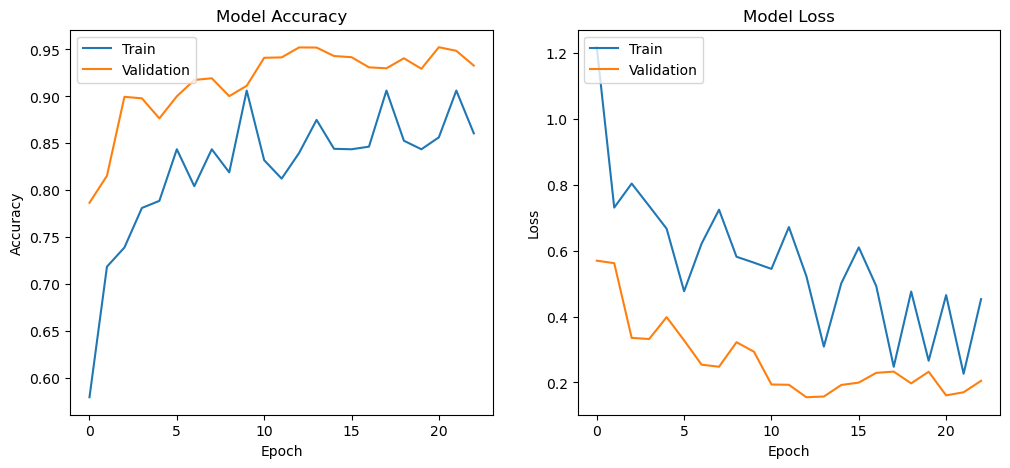

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Sauvegarde du model

In [106]:
model.save('model_cnn.h5')